## Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm

In [2]:
import sys
sys.path.append('../../')

from cossif import CosSIF
from plot_images import plot_images_last_four

## Create Folder

In [3]:
current_path = os.getcwd().replace(os.sep, '/')
save_path = os.path.join(current_path, 'ISIC-2016_FBGT_record')

if os.path.exists(save_path):
    print("Folder already exist!")
else:
    os.mkdir(save_path)
    
    print("Folders successfully created!")

Folders successfully created!


## Directories

In [4]:
root = os.path.abspath('../../../datasets/ISIC-2016')

cls_benign = root + '/split/train/benign'
cls_malignant = root + '/split/train/malignant'

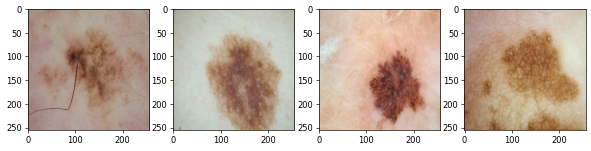

In [5]:
plot_images_last_four(cls_benign)

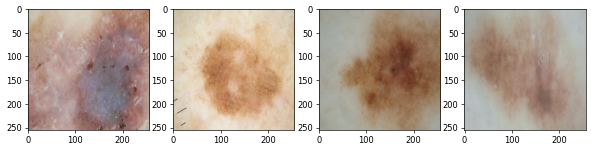

In [6]:
plot_images_last_four(cls_malignant)

## Calculate Similarities

In [7]:
cossif = CosSIF()

In [8]:
##########################################
# target class: benign                   #
# type: real images                      #
##########################################
# secondary class: malignant             #
# type: real images                      #
##########################################
cossif.calculate_similarities(
    t_path=cls_benign, 
    s_path=cls_malignant, 
    save_path=save_path, 
    file_name='ISIC-2016_FBGT_t_benign', 
    image_size=64,
    record_range=1
)

##########################################
# target class: malignant                #
# type: real images                      #
##########################################
# secondary class: benign                #
# type: real images                      #
##########################################
cossif.calculate_similarities(
    t_path=cls_malignant, 
    s_path=cls_benign, 
    save_path=save_path, 
    file_name='ISIC-2016_FBGT_t_malignant', 
    image_size=64,
    record_range=1
)

+--------------+---------+
| TARGET CLASS | SAMPLES |
+--------------+---------+
|    benign    |   727   |
+--------------+---------+
+-------------------------+---------+
| SECONDARY CLASS/CLASSES | SAMPLES |
+-------------------------+---------+
|        malignant        |   173   |
+-------------------------+---------+
Resizing images of the target class...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 727/727 [00:00<00:00, 936.52it/s]


Resizing images of the secondary class/classes...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 173/173 [00:00<00:00, 859.20it/s]


Calculating Similarities...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 727/727 [00:33<00:00, 21.60it/s]


+--------------+---------+
| TARGET CLASS | SAMPLES |
+--------------+---------+
|  malignant   |   173   |
+--------------+---------+
+-------------------------+---------+
| SECONDARY CLASS/CLASSES | SAMPLES |
+-------------------------+---------+
|          benign         |   727   |
+-------------------------+---------+
Resizing images of the target class...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 173/173 [00:00<00:00, 788.46it/s]


Resizing images of the secondary class/classes...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 727/727 [00:00<00:00, 815.98it/s]


Calculating Similarities...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 173/173 [00:33<00:00,  5.14it/s]


## Filter Images

In [9]:
t_benign = np.load(os.path.join(save_path, 'ISIC-2016_FBGT_t_benign.npy'), allow_pickle=True)
t_malignant = np.load(os.path.join(save_path, 'ISIC-2016_FBGT_t_malignant.npy'), allow_pickle=True)

loaded_records = [
    {'class': 'benign', 'records': t_benign, 'type': 'dissimilar'}, 
    {'class': 'malignant', 'records': t_malignant, 'type': 'similar'}, 
]

# α=0.80 [alpha_1]
# α=0.85 [alpha_2]
# α=0.90 [alpha_3]

hp_alpha = [
    {'id':'alpha_1', 'value': 0.80}, 
    {'id':'alpha_2', 'value': 0.85}, 
    {'id':'alpha_3', 'value': 0.90}
]

for i in loaded_records:
    for alpha in hp_alpha:
        print(f"{i['class']} || {alpha['id']} || {'{:.2f}'.format(alpha['value'])}")
        source_path = os.path.join(root, f"split/train/{i['class']}")
        filtered_path = os.path.join(root, f"stylegan2-ada/oversampling/FBGT/{alpha['id']}/filtered/{i['class']}")
        removed_path = os.path.join(root, f"stylegan2-ada/oversampling/FBGT/{alpha['id']}/removed/{i['class']}")

        cossif.export_filtered_images(
            source_dir=source_path, 
            filtered_dir=filtered_path, 
            removed_dir=removed_path, 
            set_R=i['records'], 
            remove=i['type'],
            alpha=alpha['value']
        )

benign || alpha_1 || 0.80
+--------------+-----------------+----------------+--------------------+------------+
| Total Images | Filtered Images | Removed Images |  Threshold Score   |   Order    |
+--------------+-----------------+----------------+--------------------+------------+
|     727      |       582       |      145       | 0.9823754360821618 | Dissimilar |
+--------------+-----------------+----------------+--------------------+------------+


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 727/727 [00:01<00:00, 373.95it/s]


benign || alpha_2 || 0.85
+--------------+-----------------+----------------+-------------------+------------+
| Total Images | Filtered Images | Removed Images |  Threshold Score  |   Order    |
+--------------+-----------------+----------------+-------------------+------------+
|     727      |       618       |      109       | 0.979840028571163 | Dissimilar |
+--------------+-----------------+----------------+-------------------+------------+


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 727/727 [00:01<00:00, 395.05it/s]


benign || alpha_3 || 0.90
+--------------+-----------------+----------------+-------------------+------------+
| Total Images | Filtered Images | Removed Images |  Threshold Score  |   Order    |
+--------------+-----------------+----------------+-------------------+------------+
|     727      |       655       |       72       | 0.975804573021089 | Dissimilar |
+--------------+-----------------+----------------+-------------------+------------+


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 727/727 [00:01<00:00, 409.36it/s]


malignant || alpha_1 || 0.80
+--------------+-----------------+----------------+------------------+---------+
| Total Images | Filtered Images | Removed Images | Threshold Score  |  Order  |
+--------------+-----------------+----------------+------------------+---------+
|     173      |       139       |       34       | 0.99438036096323 | Similar |
+--------------+-----------------+----------------+------------------+---------+


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 173/173 [00:00<00:00, 383.48it/s]


malignant || alpha_2 || 0.85
+--------------+-----------------+----------------+--------------------+---------+
| Total Images | Filtered Images | Removed Images |  Threshold Score   |  Order  |
+--------------+-----------------+----------------+--------------------+---------+
|     173      |       148       |       25       | 0.9950174286971352 | Similar |
+--------------+-----------------+----------------+--------------------+---------+


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 173/173 [00:00<00:00, 380.76it/s]


malignant || alpha_3 || 0.90
+--------------+-----------------+----------------+--------------------+---------+
| Total Images | Filtered Images | Removed Images |  Threshold Score   |  Order  |
+--------------+-----------------+----------------+--------------------+---------+
|     173      |       156       |       17       | 0.9955935447527672 | Similar |
+--------------+-----------------+----------------+--------------------+---------+


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 173/173 [00:00<00:00, 372.05it/s]
